## 01 Data exploration

The goal of this notebook is to provide an insight on the future sales datasets in order to have a better understanding of the data they contain.

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

train_data = pd.read_csv('data/sales_train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [75]:
def normalize_date(date):
    expanded_date = date.str.split('.', expand=True)

    day = expanded_date[0]
    month = expanded_date[1]
    year = expanded_date[2]

    return year + '.' + month + '.' + day

train_data['date'] = normalize_date(train_data['date'])

In [77]:
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013.01.02,0,59,22154,999.00,1.0
1,2013.01.03,0,25,2552,899.00,1.0
2,2013.01.05,0,25,2552,899.00,-1.0
3,2013.01.06,0,25,2554,1709.05,1.0
4,2013.01.15,0,25,2555,1099.00,1.0


In [78]:
pd.concat([train_data.min().rename('min'), train_data.max().rename('max')], axis=1)

,min,max
date,2013.01.01,2015.10.31
date_block_num,0,33
shop_id,0,59
item_id,0,22169
item_price,-1.0,307980.0
item_cnt_day,-22.0,2169.0


In [107]:
train_data.mode()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013.12.28,11,31,20949,299.0,1.0


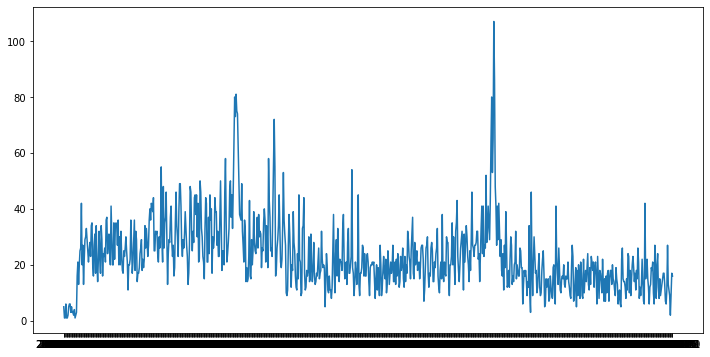

In [133]:
shop_item_data = train_data[(train_data['shop_id'] == 31) & (train_data['item_id'] == 20949)].sort_values(by='date')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(shop_item_data['date'], shop_item_data['item_cnt_day'], color='tab:blue')

In [153]:
agg_data = train_data.groupby(['shop_id', 'item_id', 'date_block_num'], as_index=False)['item_cnt_day'].sum().rename(columns={'item_cnt_day':'item_cnt_month'})

agg_data

,shop_id,item_id,date_block_num,item_cnt_month
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0
...,...,...,...,...
1609119,59,22164,27,2.0
1609120,59,22164,30,1.0
1609121,59,22167,9,1.0
1609122,59,22167,11,2.0


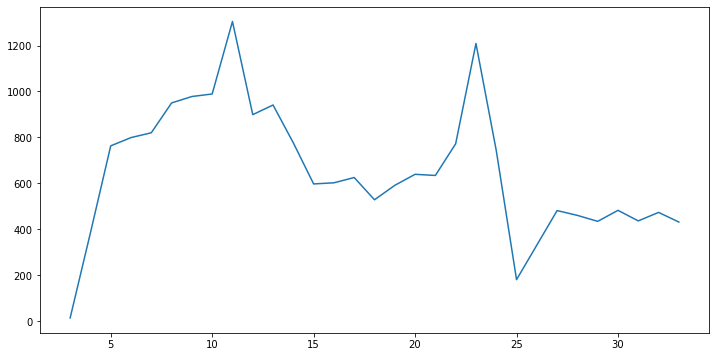

In [154]:
shop_item_agg_data = agg_data[(agg_data['shop_id'] == 31) & (agg_data['item_id'] == 20949)].sort_values(by='date_block_num')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(shop_item_agg_data['date_block_num'], shop_item_agg_data['item_cnt_month'], color='tab:blue')

In [155]:
avg_data = agg_data.groupby(['shop_id', 'item_id'], as_index=False)['item_cnt_month'].mean().rename(columns={'item_cnt_month':'item_avg_month'})

avg_data

,shop_id,item_id,item_avg_month
0,0,30,31.000000
1,0,31,11.000000
2,0,32,8.000000
3,0,33,3.000000
4,0,35,7.500000
...,...,...,...
424119,59,22154,1.000000
424120,59,22155,1.000000
424121,59,22162,3.200000
424122,59,22164,1.500000


In [152]:
test_data

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [162]:
predictions = pd.merge(test_data, avg_data, on=['shop_id', 'item_id'], how='left').rename(columns={'item_avg_month': 'item_cnt_month'}).fillna(0)

predictions

,ID,shop_id,item_id,item_cnt_month
0,0,5,5037,1.444444
1,1,5,5320,0.000000
2,2,5,5233,2.000000
3,3,5,5232,1.000000
4,4,5,5268,0.000000
...,...,...,...,...
214195,214195,45,18454,1.800000
214196,214196,45,16188,0.000000
214197,214197,45,15757,1.166667
214198,214198,45,19648,0.000000


In [163]:
output = pd.DataFrame({'ID': predictions['ID'], 'item_cnt_month': predictions['item_cnt_month']})
output.to_csv('predictions/averages.csv', index=False)
print("Submission successfully saved!")

Submission successfully saved!
